# Linear Regression 

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import time
from sklearn.linear_model import LinearRegression, Lasso,Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score #metrics for model eval for regression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score #math measures 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [5]:
df = pd.read_csv("C:\\Users\\chand\\Documents\\Git Repos\\AIML-1\\DataWranglingDataset\\Dataset\\boston_sklearn.csv")

In [7]:
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Soft clipping of outliers 

<Axes: xlabel='MEDV'>

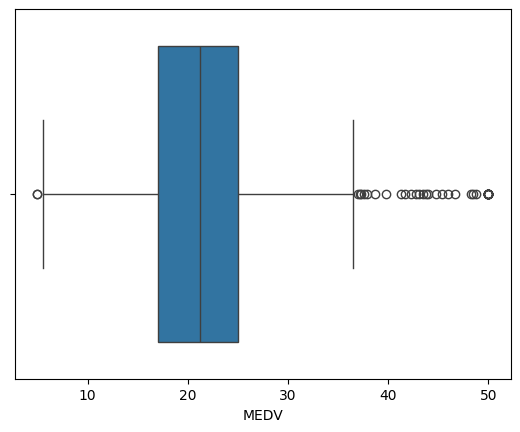

In [6]:

sns.boxplot(x=df["MEDV"])

In [8]:
upper_limit = df["MEDV"].quantile(0.95)
lower_limit = df["MEDV"].quantile(0.05)

In [9]:
mask = (df['MEDV']< upper_limit) & (df['MEDV']>lower_limit)
dfnool = df[mask]

<Axes: xlabel='MEDV'>

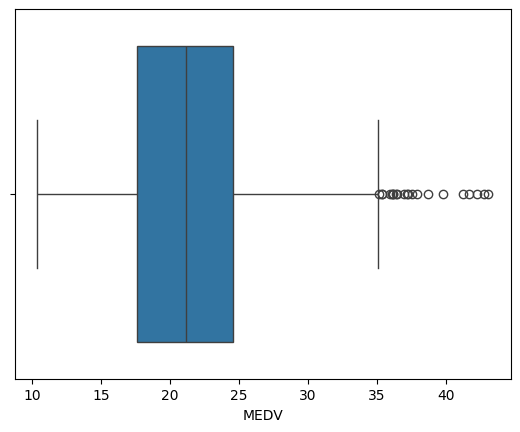

In [11]:
sns.boxplot(x=dfnool['MEDV'])

Use statsmodels to deplou linear regression  
- before deploying linear regression in ML `sklearn` check the model linearity and colinearity using `statsmodels` tools
- it offers a comprehensive stat report 
- it will explain your model fitness 

In [16]:
#Split the data into x and y link in machine learning 
x = dfnool.drop(["MEDV"],axis=1)
y = dfnool['MEDV']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.25,random_state=1)

In [21]:
#preparte x for statsmodels by adding a dummy constant. 
#define a constant or intercept for the multi_linear regression formula 
x_constant = sm.add_constant(x)
x_constant

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [22]:
ols_model = sm.OLS(y,x_constant).fit()

In [23]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     93.72
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          1.21e-117
Time:                        07:07:21   Log-Likelihood:                -1190.4
No. Observations:                 453   AIC:                             2409.
Df Residuals:                     439   BIC:                             2467.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         32.7369      3.835      8.535      0.000      25.199      40.275
CRIM          -0.1108      0.032     -3.468      0.001      -0.174      -0.048
ZN             0.0359      0.011      3.385      0.001       0.015       0.057
INDUS         -0.0461      0.046     -1.009      0.314      -0.136       0.044
CHAS           0.4062      0.685      0.593      0.553      -0.940       1.752
NOX          -11.6633      2.818     -4.139      0.000     -17.201      -6.126
RM             3.1756      0.352      9.029      0.000       2.484       3.867
AGE           -0.0234      0.010     -2.347      0.019      -0.043      -0.004
DIS           -1.1106      0.148     -7.488      0.000      -1.402      -0.819
RAD            0.2459      0.052      4.763      0.000       0.144       0.347
TAX           -0.0122      0.003     -4.249      0.000      -0.018      -0.007
PTRATIO       -0.7419      0.097     -7.682      0.000      -0.932      -0.552
B              0.0070      0.002      3.152      0.002       0.003       0.011
LSTAT         -0.3330      0.042     -7.951      0.000      -0.415      -0.251
==============================================================================
Omnibus:                       82.409   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              165.209
Skew:                           0.993   Prob(JB):                     1.33e-36
Kurtosis:                       5.192   Cond. No.                     1.47e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
#Try without removing outliers 
x2 = df.drop(["MEDV"],axis=1)
y2 = df['MEDV']
x2_constant = sm.add_constant(x2)
ols_model2 = sm.OLS(y2,x2_constant).fit()
ols_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 14 Apr 2024   Prob (F-statistic):          6.72e-135
Time:                        07:16:29   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Multicolinearity 
- in order to improve the coeff values, we need to reduce multicolinearity 
- we need to study the in-correlations between features 

In [31]:
corr = df.corr()

#Generate a mask using numpy 1s & 0s matrix to turn on/off the squares in the heatmap 
mask = np.triu(np.ones_like(corr,dtype=bool))

#set up the axes and figure 
f,ax = plt.subplot(figsize=(11,9))


#build the heatmap using the mask and the right attributes
sns.heatmap(corr,mask=mask,cmap='rainbow',vmax=.3,center=0,square=True,linewidths=.5,annot=True)


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 1000x800 with 0 Axes>

Reduce multicolinearity by using VIF analysis
- VIF: Variance Inflation Factor 
    - meausure used in regression analysis to assess the magnitude of multicolearity among variables 
    - VIF = 1 --> no multicolinearity 
    - VIF >1: some degree of multicolearity 
- You don't need to remove all of them, but super high ones have the most multicolinearity 
    - remove RM, PTRATIO, NOX, and TAX to improve the coefficient calculation 

In [35]:
#Build a VIF value dataframe for readabiity 
vif_data = pd.DataFrame()
vif_data['FeatureName'] = x.columns
vif_data['VIF_value'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

vif_data.sort_values(by='VIF_value',ascending=False)

,FeatureName,VIF_value
5,RM,95.677151
10,PTRATIO,87.404912
4,NOX,69.915592
9,TAX,57.972566
11,B,24.891855
6,AGE,20.382354
7,DIS,15.444203
8,RAD,14.128851
2,INDUS,13.154087
12,LSTAT,11.759673
